In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
d = np.genfromtxt('ej03-3.txt')
x = d[:,0]
y = d[:,1]
print(x)
print(y)

[0.1  0.25 0.41 0.56 0.71 0.86 1.02 1.17 1.32 1.47 1.63 1.78 1.93 2.08
 2.24 2.39 2.54 2.69 2.85 3.  ]
[0.738 0.826 0.981 0.974 0.915 0.897 0.739 0.785 0.635 0.52  0.49  0.428
 0.497 0.355 0.359 0.328 0.44  0.441 0.433 0.419]


In [11]:
def f(x,a,b,c):
    return a+np.exp(-b*x)*np.sin(c*x)

In [9]:
from scipy.optimize import curve_fit

In [14]:
(a,b,c),_=curve_fit(f,x,y)
print(a,b,c)

0.48091595210776134 1.02623345485013 1.916035061692375


In [21]:
chicuad=np.sum((y-f(x,a,b,c))**2)

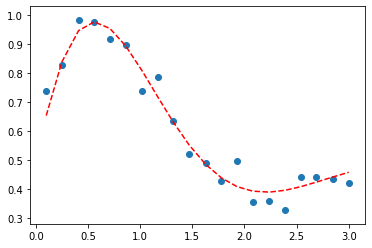

In [19]:
plt.scatter(x,y)
plt.plot(x,f(x,a,b,c),'--',color='red')

In [22]:
print(chicuad)

0.03819275173713937


In [24]:
from scipy.optimize import least_squares

In [26]:
def ep(a,x,y):
    return a[0]+np.exp(-a[1]*x)*np.sin(a[2]*x) - y
    #return f(x,a,b,c) = f(x,a[0],a[1],a[2])-y
a_in=[0.5,1,2]

In [27]:
least_squares(ep,a_in,args=(x,y))

 active_mask: array([0., 0., 0.])
        cost: 0.019096375868419162
         fun: array([-0.0852242 ,  0.01151871, -0.03575093,  0.00147662,  0.03784441,
       -0.00358785,  0.06748014, -0.06834579, -0.00574699,  0.03156009,
       -0.00561975,  0.01014988, -0.08895164,  0.03753151,  0.03027684,
        0.06761587, -0.03198933, -0.01726752,  0.00857936,  0.03845059])
        grad: array([-2.87903035e-11,  1.27573993e-07,  1.30133559e-07])
         jac: array([[ 1.        , -0.01718597,  0.08859517],
       [ 1.        , -0.08915068,  0.17165757],
       [ 1.        , -0.19037656,  0.19030937],
       [ 1.        , -0.27695394,  0.15051629],
       [ 1.        , -0.33506916,  0.07156144],
       [ 1.        , -0.35474668, -0.0273676 ],
       [ 1.        , -0.3320754 , -0.13400791],
       [ 1.        , -0.27581368, -0.21894829],
       [ 1.        , -0.19580484, -0.27871169],
       [ 1.        , -0.10384679, -0.30817791],
       [ 1.        , -0.00564669, -0.30594433],
       [ 1.  

In [29]:
a2,b2,c2 = least_squares(ep,a_in,args=(x,y)).x

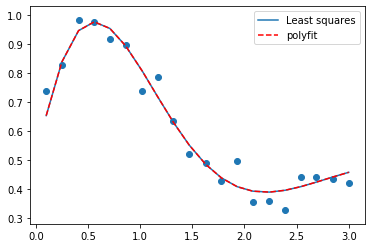

In [33]:
plt.scatter(x,y)
plt.plot(x,f(x,a2,b2,c2),label='Least squares')
plt.plot(x,f(x,a,b,c),'--',color='red',label='polyfit')
plt.legend()

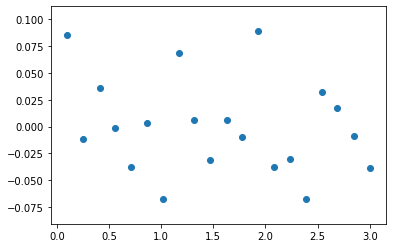

In [35]:
#residuos
ep = y- (f(x,a2,b2,c2))
plt.scatter(x,ep)